In [1]:
#!/usr/bin/env python
# coding: utf-8
from __future__ import print_function
from collections import defaultdict
import pandas as pd
import time
import numpy as np
import pyspark
from utilities import *
from scipy.stats import pearsonr

In [2]:
sc = pyspark.SparkContext()

In [20]:
inh = 'ATV'
vec_string = 'dist_vec'
#vec_string = 'count_vec'

In [21]:
sparkfilename = get_sparkfilename(inh,vec_string)

In [22]:
header = 'path_id,inh_type,vec_type,root_mutation,path_length,path_type,fraction_above_inh_threshold,path_variance'.split(",")
header = header[3:]

In [23]:
print(header)

['root_mutation', 'path_length', 'path_type', 'fraction_above_inh_threshold', 'path_variance']


In [24]:
c = {n:i for i,n in enumerate(header)}

In [25]:
data = sc.textFile(sparkfilename).map(lambda x:x.split(",")[3:])
print(data.count())

3674406


In [26]:
type_frac_var = data.map(lambda x:(x[c['path_type']], x[c['fraction_above_inh_threshold']], x[c['path_variance']]))

In [27]:
above_listfrac_listvar = type_frac_var.map(lambda x:(x[0],(float(x[1]),float(x[2])))).groupByKey().map(lambda x:(x[0],separate(list(x[1])))).filter(lambda x:x[0]=='above')

In [28]:
viz_ = above_listfrac_listvar.collectAsMap()

In [29]:
viz_.keys()

dict_keys(['above'])

In [30]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 10, 10
keys = ['above']

In [31]:
plt.rcParams['figure.figsize'] = 10, 10

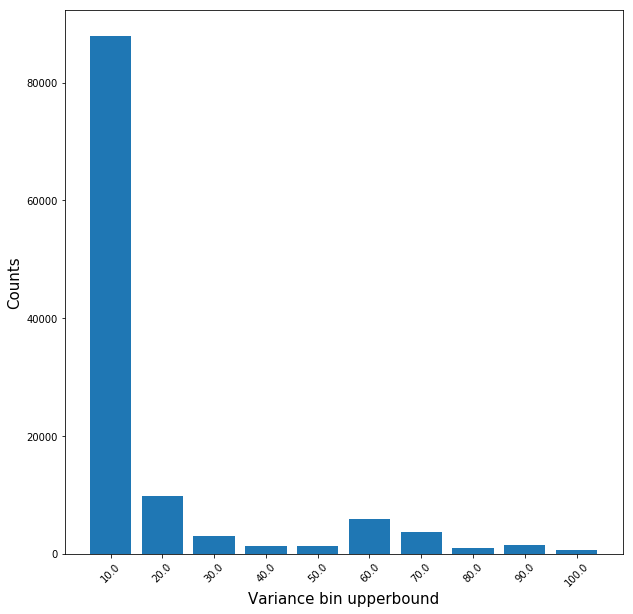

In [32]:
if viz_:
        above_frac, above_var = viz_[keys[0]]
        total = len(above_var)
        above_var = list(filter(lambda x:x<=100,above_var))
        counts,bins = np.histogram(above_var,bins=10)
        bins = [str(round(x,1)) for x in bins[1:]]
        ypos = range(len(counts))
        plt.bar(ypos,counts)
        plt.xticks(ypos,bins,rotation=45)
        plt.xlabel("Variance bin upperbound",fontsize=15)
        plt.ylabel("Counts",fontsize=15)
        #plt.title("histogram of "+inh+" "+vec_string+" shortest paths "+keys[0]+" threshold",fontsize=20)

In [33]:
100 - len(above_var)*100.0/total

6.855058521725184

In [ ]:
print(get_figfile(inh,vec_string,keys[-1]).split("/")[-1])

In [ ]:
list(zip(counts,bins))

In [ ]:
        counts,bins = np.histogram(filtered_var,bins=10)
        bins = [str(round(x,1)) for x in bins[1:]]
        ypos = range(len(counts))
        plt.bar(ypos,counts)
        plt.xticks(ypos,bins,rotation=90)
        #plt.xlabel("Variance bin upperbound",fontsize=15)
        #plt.ylabel("Counts",fontsize=15)
        # plt.title("histogram of "+inh+" "+vec_string+" shortest paths "+keys[0]+" threshold",fontsize=20)